<a href="https://colab.research.google.com/github/gmb408/OSSP-KBO-prediction/blob/main/20184444_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive', force_remount=True)
df_train = pd.read_csv('/content/gdrive/My Drive/CSV/train.csv')

Mounted at /content/gdrive


In [32]:
# Input Feature는 4개만 활용함
x_train = np.zeros([len(df_train), 7])
y_train = df_train["Survived"]
print(x_train.shape, y_train.shape)

(891, 7) (891,)


In [33]:
# Sex
x_train[:, 0] = df_train["Sex"].map( {"male": 0, "female": 1} ).astype(float)
# Pclass
x_train[:, 1] = df_train["Pclass"].map( {3: 0, 2: 1, 1: 2} ).astype(float)
# Fare
x_train[:, 2] = (df_train["Fare"] - df_train["Fare"].mean()) / df_train["Fare"].std()
# Embarked
# fillna("S") : missing data에 대한 처리
x_train[:, 3] = df_train["Embarked"].fillna("S").map( {"S": 0, "Q": 1, "C": 2} ).astype(float)
#AGE
a = df_train["Age"].mean()
x_train[:, 4] = df_train["Age"].fillna(a)
x_train[:,4]= (df_train["Age"] - df_train["Age"].mean()) / df_train["Age"].std()
#SibSp
a = df_train["SibSp"].mean()
x_train[:, 5] = df_train["SibSp"].fillna(0)
x_train[:,5]= (df_train["SibSp"] - df_train["SibSp"].mean()) / df_train["SibSp"].std()
#Parch
a = df_train["Parch"].mean()
x_train[:, 6] = df_train["Parch"].fillna(0)
x_train[:,5]= (df_train["Parch"] - df_train["Parch"].mean()) / df_train["Parch"].std()

In [34]:
w = np.random.rand(7)
b = np.random.rand()
print(w, b)

[0.80112119 0.67922232 0.79997527 0.88191077 0.96967466 0.404429
 0.74732469] 0.3373306663402206


In [35]:
def sigmoid(x):
 return 1.0 / (1.0 + np.exp(-x))
def hypothesis(w, x, b):
 return sigmoid(x.dot(w) + b)
def cost_function(h, y):
 return -np.mean(y * np.log(h + 1e-8) + (1.0 - y) * np.log(1.0 - h + 1e-8))

In [36]:
epoch = 30000
alpha = 5e-3
total_loss = []
for i in range(epoch):
 h = hypothesis(w, x_train, b)
 loss = cost_function(h, y_train)

 for j in range(4):
  w[j] = w[j] - alpha * np.mean((h - y_train) * x_train[:, j])
 b = b - alpha * np.mean((h - y_train))
 total_loss.append(loss)
total_loss = np.array(total_loss) 

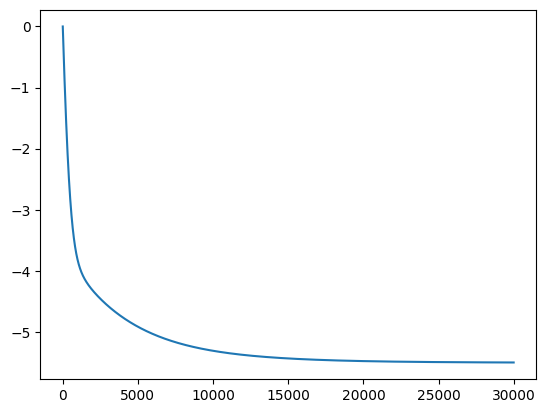

In [37]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-5))))
plt.show()

In [38]:
# 자신의 경로에 맞게 설정하자!
# Test 데이터셋에 대한 File Open
df_test = pd.read_csv('/content/gdrive/My Drive/CSV/test.csv')
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
# Input Feature는 4개만 활용함
x_test = np.zeros([len(df_test), 7])
print(x_test.shape)

(418, 7)


In [40]:
# Sex
x_test[:, 0] = df_test["Sex"].map( {"male": 0, "female": 1} ).astype(float)
# Pclass
x_test[:, 1] = df_test["Pclass"].map( {3: 0, 2: 1, 1: 2} ).astype(float)
# Fare
# fillna(df_train["Fare"].mean()) : missing data에 대한 처리
x_test[:, 2] = (df_test["Fare"].fillna(df_train["Fare"].mean()) - df_train["Fare"].mean()) / df_train["Fare"].std()
# Embarked
x_test[:, 3] = df_test["Embarked"].map( {"S": 0, "Q": 1, "C": 2} ).astype(float)
#AGE
a = df_test["Age"].mean()
x_test[:, 4] = df_test["Age"].fillna(a)
x_test[:,4]= (df_test["Age"] - df_test["Age"].mean()) / df_test["Age"].std()
#SibSp
a = df_test["SibSp"].mean()
x_test[:, 5] = df_test["SibSp"].fillna(0)
x_test[:,5]= (df_test["SibSp"] - df_test["SibSp"].mean()) / df_test["SibSp"].std()
#Parch
a = df_test["Parch"].mean()
x_test[:, 6] = df_test["Parch"].fillna(0)
x_test[:,5]= (df_test["Parch"] - df_test["Parch"].mean()) / df_test["Parch"].std()

In [41]:
y_pred = hypothesis(w, x_test, b)
y_pred = np.round(y_pred)
print(y_pred.shape)


(418,)


In [42]:
submission = pd.DataFrame({
 "PassengerId" : df_test["PassengerId"].astype(int),
 "Survived" : y_pred.astype(int)
})
# 구글 코랩에 대한 파일 경로를 추가하자!
submission.to_csv("/content/gdrive/My Drive/CSV/result.csv", index=False)
